# 🚀 다변수 입력 및 3D 착륙 위치 예측 미션

## "AI 드론의 고급 착륙 예측: 3D 좌표 학습하기"

### 📜 시나리오

이제는 드론이 3차원 공간에서 착륙해야 합니다.  
입력은 `(위도, 경도, 고도)`이고, 드론은 이 정보를 바탕으로 `(목표 X, Y, Z)` 좌표에 정확히 착륙해야 합니다.

단순한 회귀가 아닌, **3차원 벡터 예측 문제**로 확장됩니다.


### 🧪 실습 목표

- 다변수 입력 (3D 위치: 위도, 경도, 고도)
- 다차원 출력 (착륙 좌표: X, Y, Z)
- 신경망 순전파, 역전파 구현
- MSE 손실과 학습 시각화


### 📂 데이터 구성

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# 한글 깨짐 방지 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path, size=12)
rc('font', family=font.get_name())

# 입력: 위도, 경도, 고도 (예시 데이터 4개)
X = np.array([
    [10.0, 20.0, 100.0],
    [15.0, 25.0, 120.0],
    [12.0, 22.0, 110.0],
    [14.0, 24.0, 115.0],
])

# 출력: 착륙해야 할 3D 위치 (X, Y, Z)
y = np.array([
    [5.0,  3.0,  0.5],
    [6.5,  4.0,  0.8],
    [5.5,  3.5,  0.6],
    [6.2,  3.8,  0.7],
])

# 초기 가중치 및 편향 설정
np.random.seed(1)
W1 = np.random.randn(3, 6)  # 입력 3 → 은닉 6
b1 = np.zeros((1, 6))
W2 = np.random.randn(6, 3)  # 은닉 6 → 출력 3
b2 = np.zeros((1, 3))

### 🔧 ReLU 활성화 함수

In [24]:
def relu(x):
    # ReLU 활성화 함수
    return np.maximum(0, x)

def relu_grad(x):
    # ReLU의 미분
    grad = np.zeros_like(x)
    grad[x > 0] = 1
    return grad

### 🔍 순전파

In [25]:
def forward(X):
    global Z1, A1, Z2, y_pred
    Z1 = X @ W1 + b1        # 은닉층 선형 조합
    A1 = relu(Z1)           # 은닉층 활성화           
    Z2 = A1 @ W2 + b2       # 출력층 선형 조합
    y_pred = Z2             # 출력층 활성화 없음 (선형 출력)
    return y_pred



### 🔄 역전파 및 경사하강법

In [26]:
def mse_loss(y_pred, y_true):
     return np.mean(np.square(y_pred - y_true))

def backward(X, y_true, lr=0.001):
     global W1, b1, W2, b2
     m = X.shape[0]

     dZ2 = (y_pred - y_true) / m
     dW2 = A1.T @ dZ2
     db2 = np.sum(dZ2, axis=0, keepdims=True)
     dA1 = dZ2 @ W2.T
     dZ1 = dA1 * relu_grad(Z1)
     dW1 = X.T @ dZ1
     db1 = np.sum(dZ1, axis=0, keepdims=True)
     W1 -= lr * dW1
     b1 -= lr * db1
     W2 -= lr * dW2
     b2 -= lr * db2
     return dW1, db1, dW2, db2

    

### 🧮 학습 실행

In [27]:
loss_history = []

for epoch in range(500):
    forward(X)

    loss = mse_loss(y_pred, y)
    loss_history.append(loss)
    
    backward(X, y, lr=0.01)



### 📊 손실 시각화

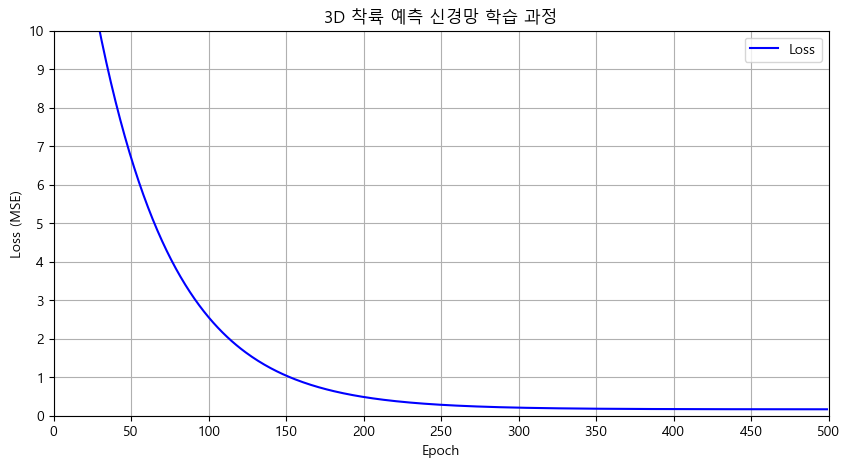

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss', color='blue')

# 축 설정
plt.ylim(0, 10)
plt.xlim(0, 500)
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0, 11, 1))

# 레이블 및 스타일
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("3D 착륙 예측 신경망 학습 과정")
plt.legend()
plt.grid(True)
plt.show()

### 🎁 보너스 미션

- `tanh` 또는 `sigmoid` 활성화 함수로 변경해 보세요.
- 드론의 현재 속도, 풍속, 배터리 잔량 등을 추가 입력 특성으로 확장해보세요.


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)